## 🏢🧑‍🤝‍🧑 MALL CUSTOMER SEGMENTATION

#### ⛒ KMeans Clustering Project

Customer segmentation is when a company divides its customers into groups based on similar traits like age, interests, and spending habits. This helps the company target its marketing efforts better and make customers happier by giving them more personalized experiences. By understanding these groups, the company can make better products, be more successful with its marketing, and make more money.

### ✅ IMPORTED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython import display

# Machine Learning Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")

### ✅ DATA INFORMATION

#### ▪️ Column names with corresponding descriptions:
- **Customer ID** - Customer's unique ID.
- **Gender** - Customer's gender.
- **Age** - Customer's age.
- **Annual Income (k$)** - Customer's annual income in thousands.
- **Spending Score (1-100)** - Scores ranging from 1-100 which was given based on customer behavior and spending habits by the mall.

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Checking the type of data
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### ✅ DATA CLEANING

In [4]:
df = df.set_index('CustomerID')
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
# Dropping all null and duplicate values

df = df.dropna()
df.drop_duplicates()

print("Null values in the dataset:", df.isnull().sum().sum())

Null values in the dataset: 0


#### ▪️ Age Group

In [6]:
# Adding new column to group data by "Age" with 10 years gap.


df.loc[df['Age']<=20, 'Age Group'] = '10-20'
df.loc[df['Age'].between(21,30), 'Age Group'] = '21-30'
df.loc[df['Age'].between(31,40), 'Age Group'] = '31-40'
df.loc[df['Age'].between(41,50), 'Age Group'] = '41-50'
df.loc[df['Age'].between(51,60), 'Age Group'] = '51-60'
df.loc[df['Age']>60, 'Age Group'] = '60+'

#### ▪️ Income Group

In [7]:
# Adding new column to group data by "Income" with 15,000$ gap.

df.loc[df['Annual Income (k$)']<=20, 'Income Group'] = '10-20'
df.loc[df['Annual Income (k$)'].between(21,35), 'Income Group'] = '21-35'
df.loc[df['Annual Income (k$)'].between(36,50), 'Income Group'] = '36-50'
df.loc[df['Annual Income (k$)'].between(51,65), 'Income Group'] = '51-65'
df.loc[df['Annual Income (k$)'].between(66,80), 'Income Group'] = '66-80'
df.loc[df['Annual Income (k$)'].between(81,95), 'Income Group'] = '81-95'
df.loc[df['Annual Income (k$)'].between(96,110), 'Income Group'] = '96-110'
df.loc[df['Annual Income (k$)'].between(111,125), 'Income Group'] = '111-125'
df.loc[df['Annual Income (k$)']>125, 'Income Group'] = '125+'

### ✅ DATA ANALYSIS

In [8]:
# Getting basic statistics of all numerical columns
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# This function groups the data in the "Age Group" column
#  and returns the count of values in the "Annual Income (k$)" column for each group.


print("\n",'\033[1m' +'Customers within age group 31-40 appear to be with the largest number of values, with 60 occurrences. However, age groups 10-20 and 60+ have 17 occurrences each which belongs to the small number of values in the data.' + '\033[0m', "\n")
df.groupby(["Age Group"])[["Annual Income (k$)"]].count()


 Customers within age group 31-40 appear to be with the largest number of values, with 60 occurrences. However, age groups 10-20 and 60+ have 17 occurrences each which belongs to the small number of values in the data. 



,Annual Income (k$)
Age Group,
10-20,17
21-30,45
31-40,60
41-50,38
51-60,23
60+,17


In [10]:
# This function groups the data in the "Gender" column
#  and returns the count of values in the "Spending Score (1-100)" column for each group.

print("\n",'\033[1m' +'The number of "Female" customers appear to be more than the "Male" customers with 112 values, and 88 values respectively.' + '\033[0m', "\n")
df.groupby(["Gender"])[["Spending Score (1-100)"]].count()


 The number of "Female" customers appear to be more than the "Male" customers with 112 values, and 88 values respectively. 



,Spending Score (1-100)
Gender,
Female,112
Male,88


In [11]:
# The function returns a DataFrame with the mean, median, minimum, maximum, and count of values in the 
#  "Annual Income (k$)" column for each combination of "Age Group" and "Gender"

df.groupby(["Age Group","Gender"])[["Annual Income (k$)"]].agg(["mean", "median", "min", "max", "count"])

Annual Income (k$)                      
                               mean median min  max count
Age Group Gender                                         
10-20     Female          49.200000   63.0  16   65     5
          Male            51.916667   53.5  15   81    12
21-30     Female          52.413793   54.0  16   98    29
          Male            64.625000   64.5  15  137    16
31-40     Female          66.057143   70.0  17  120    35
          Male            72.240000   75.0  20  137    25
41-50     Female          61.280000   54.0  25  126    25
          Male            68.076923   71.0  39   98    13
51-60     Female          58.833333   53.5  20  101    12
          Male            54.363636   54.0  23   93    11
60+       Female          53.333333   53.5  38   65     6
          Male            48.181818   49.0  19   63    11

### ✅ DATA VISUALIZATION

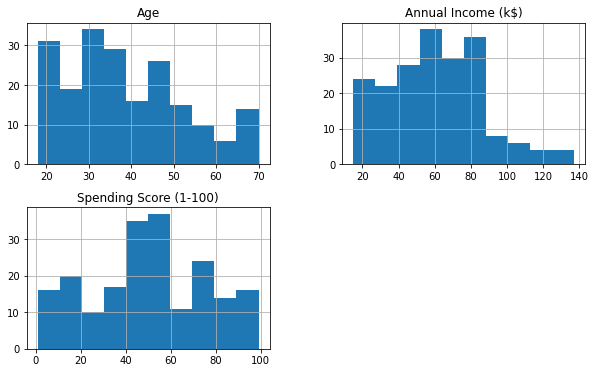

In [12]:
# Showing histograms of all columns in the DataFrame to visualize their distributions.

df.hist(figsize=(10, 6))
plt.title("Distribution of values per column",size = 20)
plt.show()

#### ▪️ Gender

Text(0.5, 1.0, 'Distribution each gender vs Spending Score')

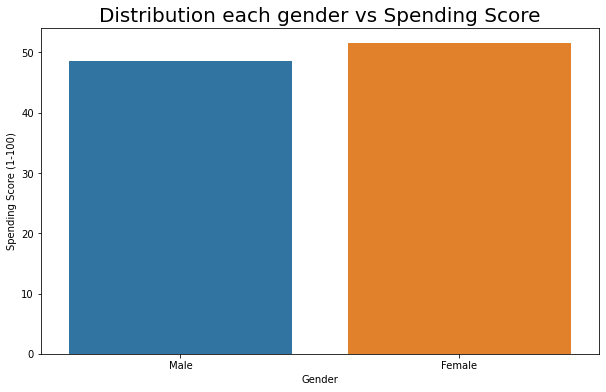

In [13]:
a= sns.barplot(data=df, x="Gender", y = "Spending Score (1-100)", ci = None)
a.figure.set_size_inches(10, 6)
plt.title("Distribution each gender vs Spending Score",size = 20)

Text(0.5, 1.0, 'Gender Distribution')

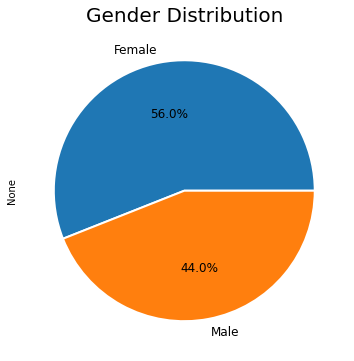

In [14]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.1f%%',figsize=(10, 6),textprops={'size': 'large'},wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Gender Distribution', size = 20)

#### ▪️ Age

Text(0.5, 1.0, 'Age Distribution')

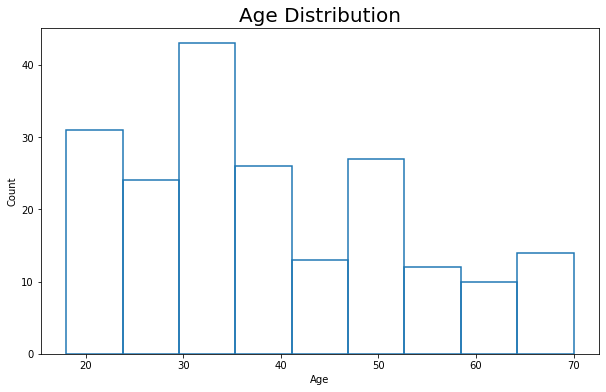

In [15]:
h= sns.histplot(data=df, x="Age", log_scale=False, element="bars", fill=False)
h.figure.set_size_inches(10, 6)
plt.title('Age Distribution', size = 20)

Text(0.5, 1.0, 'Value counts of each Age group with their corresponding Gender')

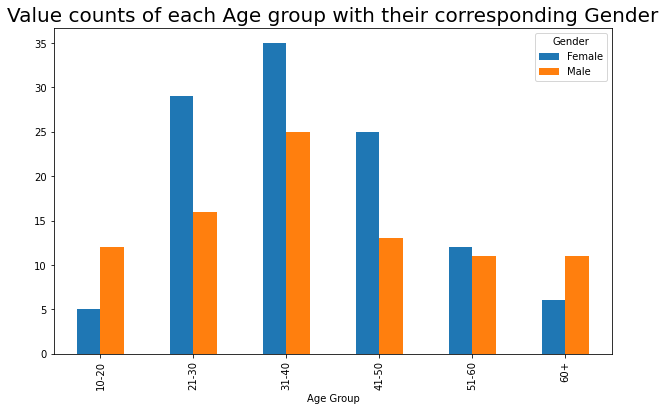

In [16]:
a = pd.crosstab(df['Age Group'],df['Gender'],).plot.bar(figsize=(10, 6))
plt.title('Value counts of each Age group with their corresponding Gender', size = 20)

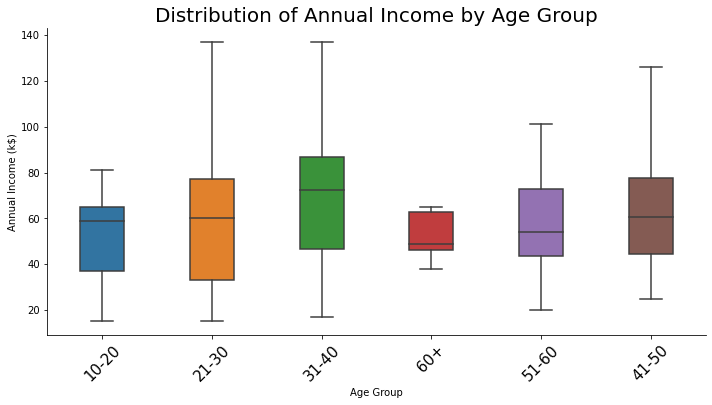

In [17]:
sns.catplot(data=df,
    x="Age Group", y="Annual Income (k$)", kind="box",
    height=5, aspect=2,
    width = 0.4,
    showfliers=False)

plt.xticks(rotation = 45, size=15)
plt.title('Distribution of Annual Income by Age Group', size= 20)
plt.show()

Text(0.5, 1.0, 'Relationship between Age and Spending Score according to Gender')

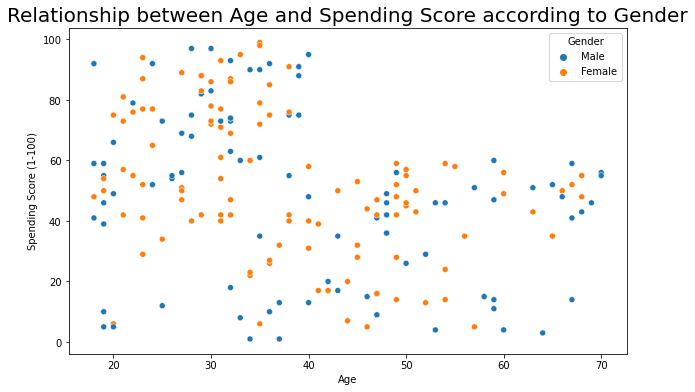

In [18]:
D= sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
D.figure.set_size_inches(10, 6)
plt.title('Relationship between Age and Spending Score according to Gender', size = 20)

#### ▪️ Income


 Income Group values in ascending order 



51-65      44
66-80      44
36-50      36
21-35      22
81-95      18
10-20      16
96-110     12
111-125     4
125+        4
Name: Income Group, dtype: int64

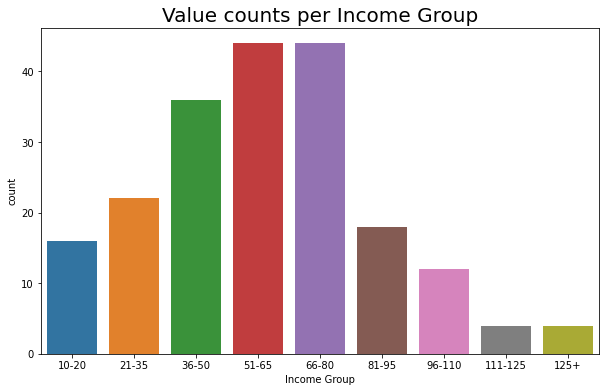

In [19]:
b = sns.countplot(data=df, x="Income Group")
b.figure.set_size_inches(10, 6)
plt.title('Value counts per Income Group', size = 20)
print("\n",'\033[1m' +'Income Group values in ascending order' + '\033[0m', "\n")
df["Income Group"].value_counts()

Text(0.5, 1.0, 'Relationship between Age and Annual Income according to Gender')

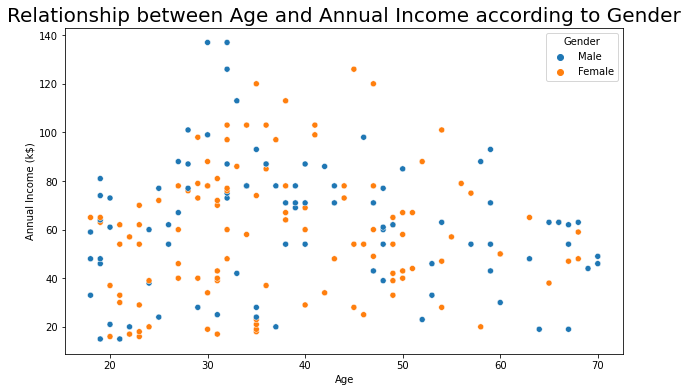

In [20]:
c =sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")
c.figure.set_size_inches(10, 6)
plt.title('Relationship between Age and Annual Income according to Gender', size = 20)


Text(0.5, 1.0, 'Value counts of each Income Group with Gender')

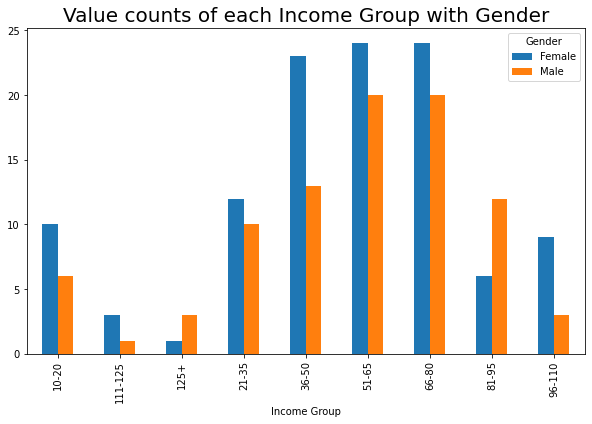

In [21]:
pd.crosstab(df['Income Group'],df['Gender']).plot.bar(figsize=(10, 6))
plt.title('Value counts of each Income Group with Gender', size = 20)

#### ▪️ Spending Score

Text(0.5, 1.0, 'Relationship between Annual Income and Spending Score according to Gender')

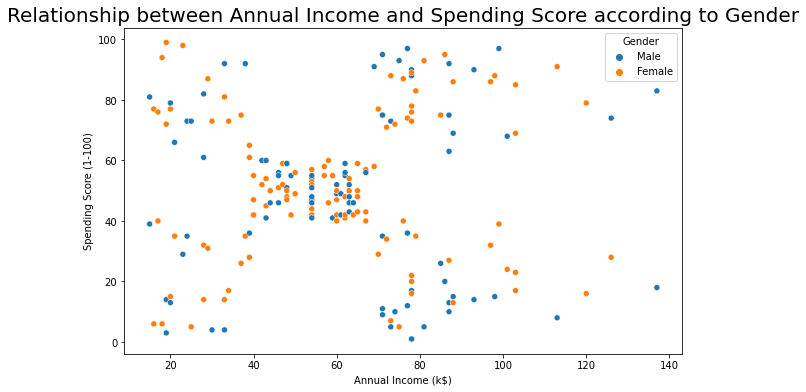

In [22]:
e= sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
e.figure.set_size_inches(10, 6)
plt.title('Relationship between Annual Income and Spending Score according to Gender', size = 20)

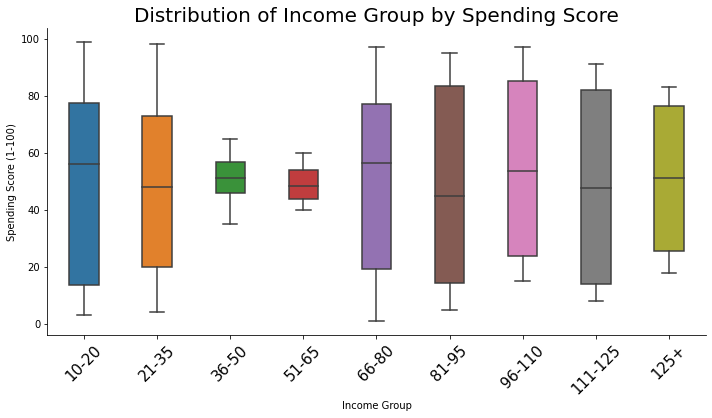

In [23]:
sns.catplot(data=df,
    x="Income Group", y="Spending Score (1-100)", kind="box",
    height=5, aspect=2,
    width = 0.4,
    showfliers=False)

plt.xticks(rotation = 45, size=15)
plt.title('Distribution of Income Group by Spending Score', size= 20)
plt.show()

### ✅ DATA PROCESSING

#### ▪️ Standardizing data
Transform features to a standard normal distribution.

In [24]:
# Defining the variable "X"
X = df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']]

# Scaling data to a standard normal distribution (mean = 0, variance = 1)
sc = StandardScaler()
X = sc.fit_transform(X)

# Creating new DataFrame
scaled_features = pd.DataFrame(X, columns = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)'])

# Adding binary categories for Gender class (1= Male, 0 = Female)
scaled_features["Gender_Male"] = np.where(df["Gender"]== "Male", 1, 0)
data = scaled_features
data.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Male
0,-1.738999,-1.424569,-0.434801,1
1,-1.738999,-1.281035,1.195704,1
2,-1.700830,-1.352802,-1.715913,0
3,-1.700830,-1.137502,1.040418,0
4,-1.662660,-0.563369,-0.395980,0


#### ▪️ New data distribution after standardizing

<AxesSubplot:xlabel='Gender_Male', ylabel='Density'>

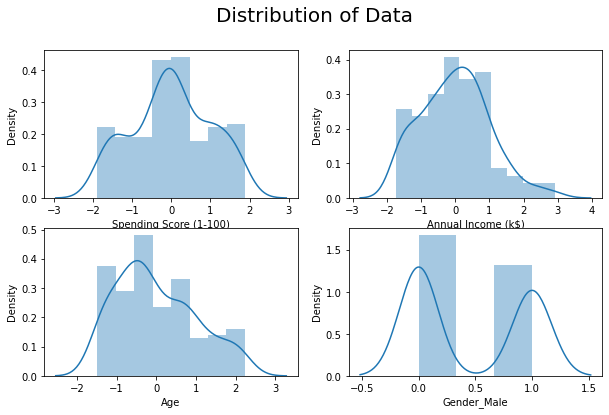

In [25]:
f, axes = plt.subplots(2, 2, figsize=(10, 6))
f.suptitle('Distribution of Data', size = 20)
sns.distplot(data['Spending Score (1-100)'],ax=axes[0, 0])
sns.distplot(data["Annual Income (k$)"],ax=axes[0, 1])
sns.distplot(data['Age'],ax=axes[1, 0])
sns.distplot(data['Gender_Male'],ax=axes[1, 1])

### ✅ MACHINE LEARNING ALGORITHMS

#### ▪️ PRINCIPAL COMPONENT ANALYSIS
Turning complicated data into a simpler version with fewer dimensions that still contain the important information.

In [26]:
# The PCA model will reduce the data to only 2 dimensions 

pca = PCA(n_components=2)
pca.fit(data)
X_pca = pca.transform(data)
pca.explained_variance_ratio_

array([0.4095285, 0.3081674])

#### ▪️ KMeans
Groups similar data points into "clusters."

In [27]:
result = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_pca)
    result.append(kmeanModel.inertia_)

#### ▪️ Plotting Elbow Method

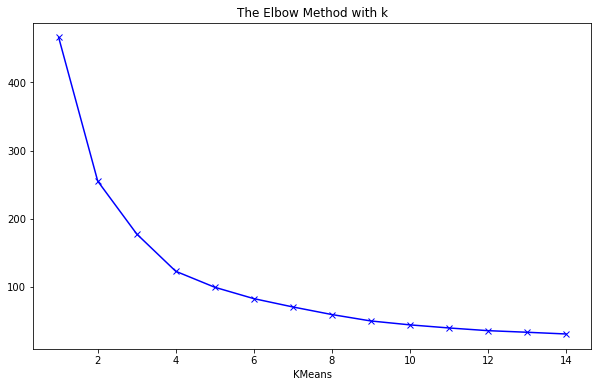


 The optimal number of clusters are: 2 and 4 



In [28]:
plt.figure(figsize=(10,6))
plt.plot(K, result, 'bx-')
plt.xlabel('KMeans')
plt.title('The Elbow Method with k')
plt.show()
print("\n",'\033[1m' + "The optimal number of clusters are: 2 and 4" + '\033[0m', "\n")

In [29]:
# Modeling with 4 clusters

kmeans1 = KMeans(n_clusters=4, init = 'k-means++',max_iter = 1000,random_state = 0)
kmeans1.fit(X_pca)
predictions = kmeans1.predict(X_pca)

In [30]:
# Getting the kmeans labels or centers.

center = kmeans1.cluster_centers_

# This represents how well the data was clustered.

kmeans1.inertia_

122.95562140065934

In [31]:
# Creating new column for cluster predictions

data["predictions"] = predictions
data.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Male,predictions
0,-1.738999,-1.424569,-0.434801,1,2
1,-1.738999,-1.281035,1.195704,1,2
2,-1.700830,-1.352802,-1.715913,0,1
3,-1.700830,-1.137502,1.040418,0,2
4,-1.662660,-0.563369,-0.395980,0,2


#### ▪️ Visualizing the Clusters

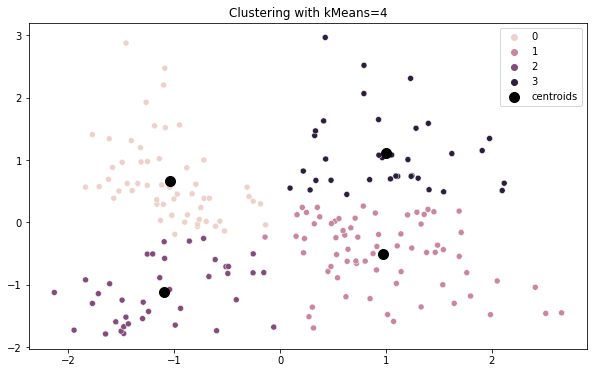

In [32]:
# Using Seaborn

plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x=X_pca[:,0], y=X_pca[:,1], hue=predictions)
plt.scatter(center[:,0], center[:,1], 
            marker="o", c="black", s=100, label="centroids")
plt.title('Clustering with kMeans=4')
plt.legend()
plt.show()

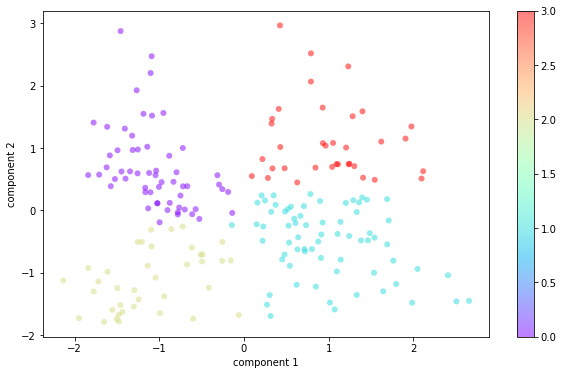

In [33]:
# Using Matplotlib
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
                c=predictions, edgecolor='none', alpha=0.5,
                cmap='rainbow'
               )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


### ✅ INTERPRETATION

In [34]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

df_new = pd.DataFrame(df)
df_new['cluster'] = predictions
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,2


In [35]:
df_new['cluster'].value_counts()

1    69
0    58
2    38
3    35
Name: cluster, dtype: int64

#### ▪️ Manual Filtering

In [36]:
df_new[df_new['cluster']==3][0:58]
# df_new[df_new['cluster']==1][0:10]
# df_new[df_new['cluster']==2][0:10]
# df_new[df_new['cluster']==3][0:10]

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
126,Male,43,71,35,3
128,Male,59,71,11,3
130,Male,47,71,9,3
134,Male,20,73,5,3
136,Female,44,73,7,3
138,Male,19,74,10,3
140,Female,57,75,5,3
144,Male,25,77,12,3
146,Male,48,77,36,3
148,Female,34,78,22,3


In [37]:
avg_df = df.groupby(['cluster'], as_index=False).agg(["mean", "median", "min", "max", "count"])
avg_df

Age                      Annual Income (k$)                  \
              mean median min max count               mean median min  max   
cluster                                                                      
0        30.000000   30.5  18  40    58          79.086207   76.0  57  137   
1        52.144928   50.0  20  70    69          46.333333   48.0  16   67   
2        25.605263   24.0  18  35    38          32.631579   33.0  15   54   
3        41.685714   43.0  19  59    35          88.228571   85.0  71  137   

              Spending Score (1-100)                       
        count                   mean median min max count  
cluster                                                    
0          58              70.775862   74.5  29  97    58  
1          69              40.072464   46.0   3  60    69  
2          38              67.500000   69.0  39  99    38  
3          35              17.285714   16.0   1  39    35

#### ▪️ Detailed Filtering

### 🟠 Cluster 0

In [47]:
df_cluster_0 = df_new[df_new['cluster']==0,df_new["Age", "Annual Income (k$)","Spending Score (1-100)"]
df_grouped = df_cluster_0.groupby('Gender')
df_agg0 = df_grouped.agg(["mean", "median", "min", "max", "count"])
df_agg0

SyntaxError: invalid syntax (3928582588.py, line 2)

This cluster comprises of millennial customers, with an average age of 29-30 years old, ranging from 18 to 40 years old. The average annual income for female customers in this cluster is 78,000, while the average annual income for males is 81,000. These customers belong to a higher-than-average income group and have the highest spending scores, with an average of 74 for female customers and 75 for male customers.

**This cluster suggests a group of millennial customers with high annual incomes and high spending scores.**

### 🟠 Cluster 1

In [39]:
df_cluster_1 = df_new[df_new['cluster']==1]
df_grouped = df_cluster_1.groupby('Gender')
df_agg1 = df_grouped.agg(["mean", "median", "min", "max", "count"])
df_agg1

Age                      Annual Income (k$)                 \
             mean median min max count               mean median min max   
Gender                                                                     
Female  49.425000   49.0  20  68    40          46.250000   48.0  16  67   
Male    55.896552   57.0  35  70    29          46.448276   49.0  19  63   

             Spending Score (1-100)                      cluster             \
       count                   mean median min max count    mean median min   
Gender                                                                        
Female    40              39.725000   43.5   5  59    40     1.0    1.0   1   
Male      29              40.551724   46.0   3  60    29     1.0    1.0   1   

                  
       max count  
Gender            
Female   1    40  
Male     1    29

This cluster is the biggest cluster which is composed of middle-aged customers, with an average age of 49-57 years old, ranging from 20 to 70 years old. The average annual income in this cluster is 46,000, with the lowest income earner making 16,000 and the highest income earner making 67,000. This cluster consists of lower income earners, with an average spending score of 40 for both female and male customers.

**This suggests a group of lower income earners who have a relatively low average spending score.**

### 🟠 Cluster 2

In [40]:
df_cluster_2 = df_new[df_new['cluster']==2]
df_grouped = df_cluster_2.groupby('Gender')
df_agg2 = df_grouped.agg(["mean", "median", "min", "max", "count"])
df_agg2

Age                      Annual Income (k$)                 \
             mean median min max count               mean median min max   
Gender                                                                     
Female  26.695652   27.0  20  35    23          32.826087   34.0  16  54   
Male    23.933333   22.0  18  35    15          32.333333   28.0  15  54   

             Spending Score (1-100)                      cluster             \
       count                   mean median min max count    mean median min   
Gender                                                                        
Female    23              66.956522   72.0  40  99    23     2.0    2.0   2   
Male      15              68.333333   66.0  39  92    15     2.0    2.0   2   

                  
       max count  
Gender            
Female   2    23  
Male     2    15

This cluster is comprised of young adult customers, with an average age of 22-27 years old, and a range of ages from 18 to 35 years old. These customers have an average annual income of 33,000, with the lowest income earner making 15,000 and the highest income earner making 54,000. Despite being considered average income earners, the customers in this cluster have high spending scores, with an average of 67 for female customers and 68 for male customers. This suggests that they may have a strong spending power.

**This cluster suggests a group of young adult customers with average annual incomes and high spending scores.**

### 🟠 Cluster 3

In [41]:
df_cluster_3 = df_new[df_new['cluster']==3]
df_grouped = df_cluster_3.groupby('Gender')
df_agg3 = df_grouped.agg(["mean", "median", "min", "max", "count"])
df_agg3

Age                      Annual Income (k$)                        \
        mean median min max count               mean median min  max count   
Gender                                                                       
Female  44.6   44.0  34  57    15          92.333333   88.0  73  126    15   
Male    39.5   41.0  19  59    20          85.150000   79.5  71  137    20   

       Spending Score (1-100)                      cluster                 \
                         mean median min max count    mean median min max   
Gender                                                                      
Female                  21.60   22.0   5  39    15     3.0    3.0   3   3   
Male                    14.05   12.5   1  36    20     3.0    3.0   3   3   

              
       count  
Gender        
Female    15  
Male      20

This cluster has the smallest number of customers and consists of individuals in the 30s to 50s age group, with a range of ages from 20 to 70 years old. The female customers in this cluster have an average annual income of 92,000, while the male customers have an average annual income of 85,000. The lowest income earner in this cluster makes 71,000, while the highest income earner makes 137,000, making them the highest income earners among all groups. However, despite their high incomes, their spending scores are the lowest, with an average of 22 for female customers and 14 for male customers. They may be more conservative with their spending.

**This cluster suggests a demographic of middle-aged customers with high annual income but low spending scores.**

### ✅ INTERPRETATION VISUALIZATION

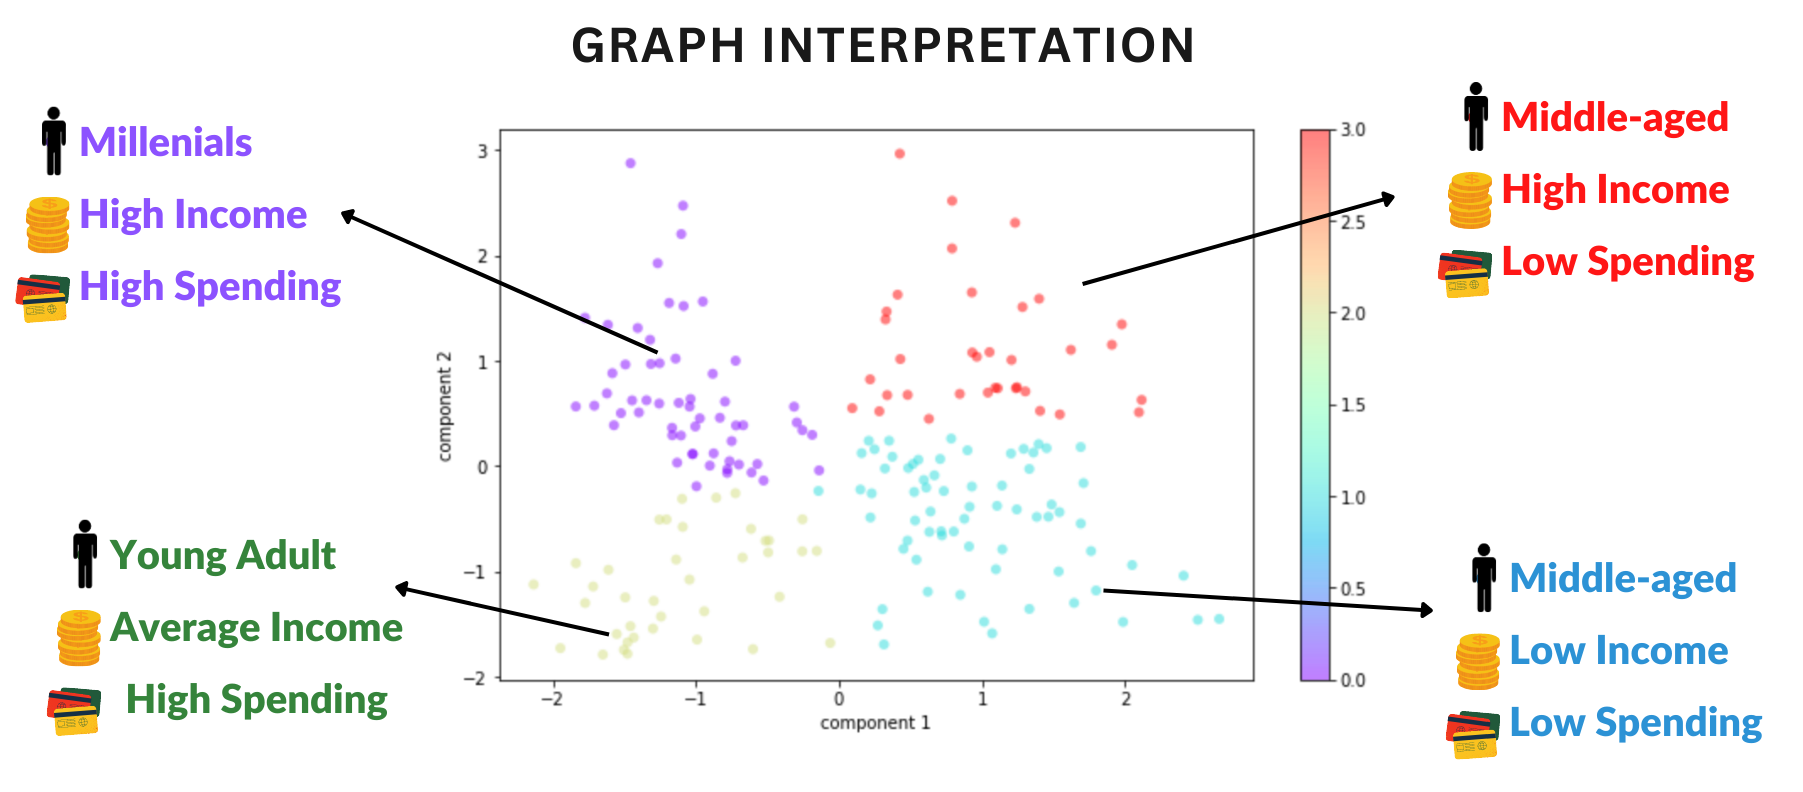

In [42]:
path = "/Users/sarbjitmadra/Desktop/assets/graph.png"
display.Image(path)

### ✅ EVALUATION

In [43]:
silhouette_score = silhouette_score(X_pca, predictions)
print("Silhouette score: {:.3f}".format(silhouette_score))

Silhouette score: 0.422


### ✅ CONCLUSION
